# YaleB人脸分类

# 参考资料
Face Recognition with Python

In [6]:

#读数据
import scipy.io as scio 


dataFile ="YaleB_32x32.mat"
data = scio.loadmat(dataFile) 

print(type(data))
print(data['fea'].shape)
print(data)
print(data['__header__'])
feature = data['fea']
classfication = data['gnd']
print(data['fea'])
print(data['gnd'])

<class 'dict'>
(2414, 1024)
{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Jun 13 16:18:43 2007', '__version__': '1.0', '__globals__': [], 'fea': array([[ 82,  81,  72, ...,  35,  33,  22],
       [ 86,  86,  74, ...,  20,  14,   9],
       [ 76,  88,  80, ...,   9,   6,   6],
       ...,
       [  3,   3,   3, ..., 200, 202, 192],
       [  3,   3,   3, ..., 253, 255, 250],
       [  5,   3,   4, ..., 174, 175, 179]], dtype=uint8), 'gnd': array([[ 1],
       [ 1],
       [ 1],
       ...,
       [38],
       [38],
       [38]], dtype=uint8)}
b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Jun 13 16:18:43 2007'
[[ 82  81  72 ...  35  33  22]
 [ 86  86  74 ...  20  14   9]
 [ 76  88  80 ...   9   6   6]
 ...
 [  3   3   3 ... 200 202 192]
 [  3   3   3 ... 253 255 250]
 [  5   3   4 ... 174 175 179]]
[[ 1]
 [ 1]
 [ 1]
 ...
 [38]
 [38]
 [38]]


In [10]:
feature = data['fea']
classfication = data['gnd']
print(feature.shape)
print(classfication.shape)

(2414, 1024)
(2414, 1)


# Algorithmic Description
# PCA
Let X = {x 1 ,x 2 ,...,x n } be a random vector with observations x i ∈ R d .
1. Compute the mean µ
µ =
1
n
n
X
i=1
x i (1)
2. Compute the the Covariance Matrix S
S =
1
n
n
X
i=1
(x i − µ)(x i − µ) T (2)
3. Compute the eigenvalues λ i and eigenvectors v i of S
Sv i = λ i v i ,i = 1,2,...,n (3)
4. Order the eigenvectors descending by their eigenvalue. The k principal components are the
eigenvectors corresponding to the k largest eigenvalues.
The k principal components of the observed vector x are then given by:
y = W T (x − µ) (4)
where W = (v 1 ,v 2 ,...,v k ). The reconstruction from the PCA basis is given by:
x = Wy + µ (5)
The Eigenfaces method then performs face recognition by:
1. Projecting all training samples into the PCA subspace (using Equation 4).
2. Projecting the query image into the PCA subspace (using Listing 5).
3. Finding the nearest neighbor between the projected training images and the projected query
image.
Still there’s one problem left to solve. Imagine we are given 400 images sized 100 × 100 pixel. The
Principal Component Analysis solves the covariance matrix S = XX T , where size(X) = 10000×400
in our example. You would end up with a 10000×10000 matrix, roughly 0.8GB. Solving this problem
isn’t feasible, so we’ll need to apply a trick. From your linear algebra lessons you know that a M ×N
matrix with M > N can only have N −1 non-zero eigenvalues. So it’s possible to take the eigenvalue
decomposition S = X T X of size NxN instead:
X T Xv i = λ i vi (6)
and get the original eigenvectors of S = XX T with a left multiplication of the data matrix:
XX T (Xv i ) = λ i (Xv i ) (7)
The resulting eigenvectors are orthogonal, to get orthonormal eigenvectors they need to be normalized
to unit length. I don’t want to turn this into a publication, so please look into [7] for the derivation
and proof of the equations.


In [11]:
def asRowMatrix(X):
    """
    Creates a row-matrix from multi-dimensional data items in list l.
    
    X [list] List with multi-dimensional data.
    """
    if len(X) == 0:
        return np.array([])
    total = 1
    for i in range(0, np.ndim(X[0])):
        total = total * X[0].shape[i]
    mat = np.empty([0, total], dtype=X[0].dtype)
    for row in X:
        mat = np.append(mat, row.reshape(1,-1), axis=0) # same as vstack
    return np.asmatrix(mat)

def asColumnMatrix(X):
    """
    Creates a column-matrix from multi-dimensional data items in list l.
    
    X [list] List with multi-dimensional data.
    """
    if len(X) == 0:
        return np.array([])
    total = 1
    for i in range(0, np.ndim(X[0])):
        total = total * X[0].shape[i]
    mat = np.empty([total, 0], dtype=X[0].dtype)
    for col in X:
        mat = np.append(mat, col.reshape(-1,1), axis=1) # same as hstack
    return np.asmatrix(mat)


PCA example with Iris Data-set

Principal Component Analysis applied to the Iris dataset.

See `here <https://en.wikipedia.org/wiki/Iris_flower_data_set>`_ for more
information on this dataset.




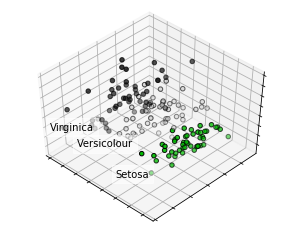

In [13]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

"""
=========================================================
PCA example with Iris Data-set
=========================================================

Principal Component Analysis applied to the Iris dataset.

See `here <https://en.wikipedia.org/wiki/Iris_flower_data_set>`_ for more
information on this dataset.

"""
print(__doc__)


# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()




# PCA提取特征的常规流程

In [4]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
print(df)

     sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0        

In [5]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

     principal component 1  principal component 2
0                -2.264542               0.505704
1                -2.086426              -0.655405
2                -2.367950              -0.318477
3                -2.304197              -0.575368
4                -2.388777               0.674767
5                -2.070537               1.518549
6                -2.445711               0.074563
7                -2.233842               0.247614
8                -2.341958              -1.095146
9                -2.188676              -0.448629
10               -2.163487               1.070596
11               -2.327378               0.158587
12               -2.224083              -0.709118
13               -2.639716              -0.938282
14               -2.192292               1.889979
15               -2.251465               2.722371
16               -2.202750               1.513750
17               -2.190179               0.514304
18               -1.894074               1.431111


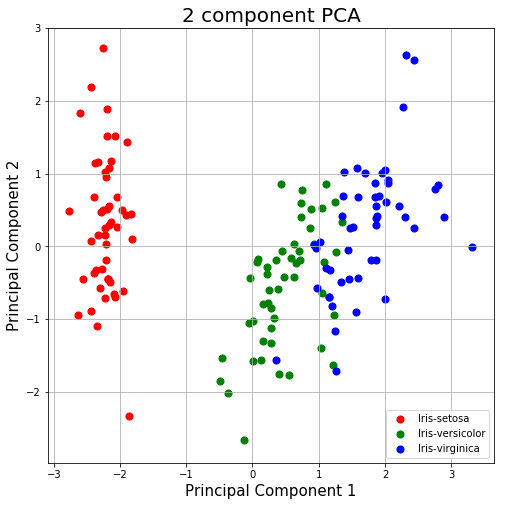

array([0.72770452, 0.23030523])

In [13]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.show()
pca.explained_variance_ratio_


# 图片处理 运用PCA
# 参考资料 https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [16]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [17]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)


In [49]:
import scipy.io as scio 


dataFile ="YaleB_32x32.mat"
data = scio.loadmat(dataFile) 

print(mnist)
print(data)

{'DESCR': 'mldata.org dataset: mnist-original', 'COL_NAMES': ['label', 'data'], 'target': array([0., 0., 0., ..., 9., 9., 9.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}
{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Jun 13 16:18:43 2007', '__version__': '1.0', '__globals__': [], 'fea': array([[ 82,  81,  72, ...,  35,  33,  22],
       [ 86,  86,  74, ...,  20,  14,   9],
       [ 76,  88,  80, ...,   9,   6,   6],
       ...,
       [  3,   3,   3, ..., 200, 202, 192],
       [  3,   3,   3, ..., 253, 255, 250],
       [  5,   3,   4, ..., 174, 175, 179]], dtype=uint8), 'gnd': array([[ 1],
       [ 1],
       [ 1],
       ...,
       [38],
       [38],
       [38]], dtype=uint8)}


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [21]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [22]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)
pca.n_components_ 

330

In [25]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, train_lbl)
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])

array([1., 9., 2., 2., 7., 1., 8., 3., 3., 7.])

In [26]:
logisticRegr.score(test_img, test_lbl)

0.9201

NameError: name 'cum_var_exp' is not defined

In [28]:
%matplotlib inline
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [29]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [30]:
# These are the images
mnist.data.shape

(70000, 784)

In [32]:
pca = PCA(.95)


In [33]:
lower_dimensional_data = pca.fit_transform(mnist.data)

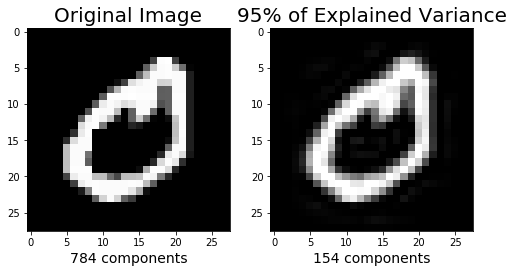

In [34]:
pca.n_components_
approximation = pca.inverse_transform(lower_dimensional_data)
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(mnist.data[1].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);
# if n_components is not set all components are kept (784 in this case)
pca = PCA()

In [35]:
pca.fit(mnist.data)
pca.n_components_

784

In [36]:
# Summing explained variance
tot = sum(pca.explained_variance_)
tot
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

tot = sum(pca.explained_variance_)
tot

var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

[9.746115922494747, 7.15544458687865, 6.149530980723025, 5.4033845285482105, 4.888933703877899]
[9.746115922494747, 7.15544458687865, 6.149530980723025, 5.4033845285482105, 4.888933703877899]


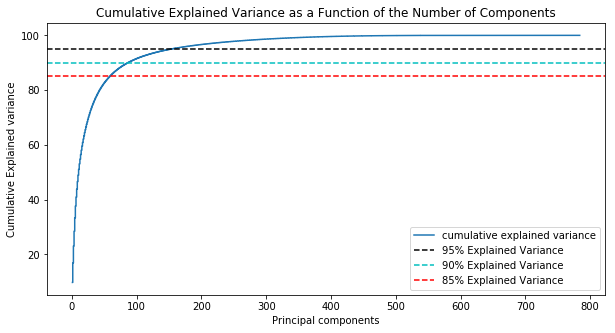

In [37]:

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED # PLOT O 
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

In [38]:
# Indices corresponding to the first occurrence are returned with the np.argmax function
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
componentsVariance = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]

In [39]:
componentsVariance

[784, 331, 154, 87, 59]

In [40]:
from sklearn.decomposition import PCA

# This is an extremely inefficient function. Will get to why in a later tutorial
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

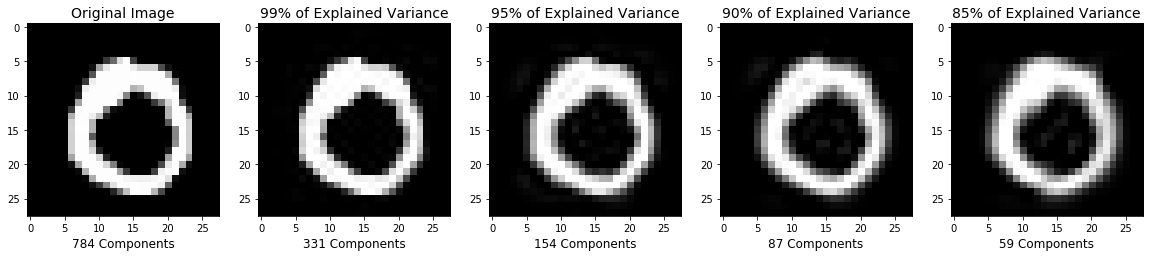

In [41]:
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(mnist.data[5].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);

In [42]:
mnist.target

array([0., 0., 0., ..., 9., 9., 9.])

# 32*32  38张人脸

In [50]:
import scipy.io as scio 


dataFile ="YaleB_32x32.mat"
data = scio.loadmat(dataFile) 


print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed Jun 13 16:18:43 2007', '__version__': '1.0', '__globals__': [], 'fea': array([[ 82,  81,  72, ...,  35,  33,  22],
       [ 86,  86,  74, ...,  20,  14,   9],
       [ 76,  88,  80, ...,   9,   6,   6],
       ...,
       [  3,   3,   3, ..., 200, 202, 192],
       [  3,   3,   3, ..., 253, 255, 250],
       [  5,   3,   4, ..., 174, 175, 179]], dtype=uint8), 'gnd': array([[ 1],
       [ 1],
       [ 1],
       ...,
       [38],
       [38],
       [38]], dtype=uint8)}


In [76]:
from sklearn.model_selection import train_test_split
feature = data['fea']
classfication = data['gnd']
train_img, test_img, train_lbl, test_lbl = train_test_split( feature,classfication, test_size=7/10.0, random_state=0)


(724, 1024)


In [77]:
print(train_img.shape)
print(test_img.shape)
print(train_lbl.shape)
print(test_lbl.shape)

(724, 1024)
(1690, 1024)
(724, 1)
(1690, 1)


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [80]:
print(train_img.shape)
print(test_img.shape)
print(train_lbl.shape)
print(test_lbl.shape)

(724, 59)
(1690, 59)
(724, 1)
(1690, 1)


In [78]:
print(train_img)

[[ 32  18  11 ...  84  94  92]
 [104 108 109 ...  16  11  10]
 [ 64  61  33 ...  98 105 111]
 ...
 [ 45  27  62 ... 113 103  95]
 [169 176 169 ...   5   5   5]
 [ 46  38  41 ...  22  19  26]]


In [54]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [56]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [57]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [79]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [61]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(train_img, train_lbl)

# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])

logisticRegr.score(test_img, test_lbl)

C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8378698224852071

# 可视化

In [63]:
%matplotlib inline
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler










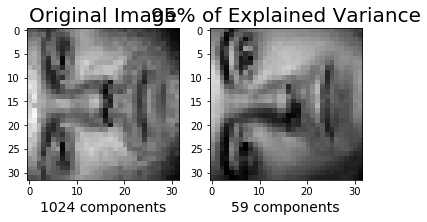

In [82]:
# Original Image
plt.subplot(1, 2, 1);
plt.imshow(data['fea'][1].reshape(32,32),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('1024 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 59 principal components
approximation = pca.inverse_transform(train_img)
plt.subplot(1, 2, 2);
plt.imshow(approximation[1].reshape(32,32),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('59 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

In [64]:
pca.n_components_

59

In [65]:
# Summing explained variance
tot = sum(pca.explained_variance_)
tot

974.7917153020728

In [67]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[38.05895334324725, 35.675715187504935, 4.55094220857327, 2.9774142459326662, 1.612351021008683]


In [68]:
tot = sum(pca.explained_variance_)
tot

974.7917153020728

In [69]:

# Cumulative explained variance# Cumula 
cum_var_exp = np.cumsum(var_exp)

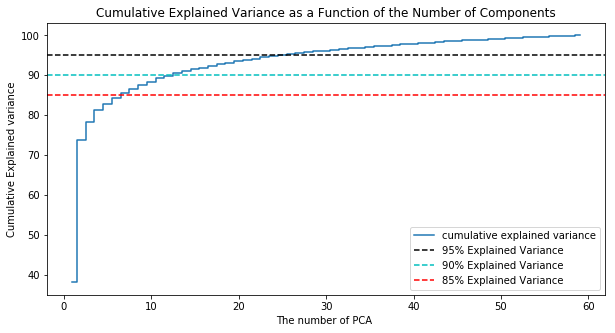

In [75]:
plt.figure(figsize=(10, 5))
plt.step(range(1, 60), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('The number of PCA ')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()